In [1]:
import assemblyfire 
from assemblyfire.topology import simplex_counts_consensus, simplex_counts_union, simplex_counts_core,\
simplex_counts_intersection, simplex_counts_core_vs_intersection


In [2]:
#For loading data, not necessary in the cluster or once certain small details are changed
import numpy as np
import pandas as pd
import h5py

In [3]:
#Load consensus assembly.  Load function doesn't work if I don't have spikes because of missing Metadata.  
#I'm doing it by hand now, with the same format it would be loaded with .... talk to Andras
h5f_name="/Users/egassant/Documents/plasticity.nosync/consensus_assemblies.h5"
prefix="consensus"
with h5py.File(h5f_name, "r") as h5f:
        keys = list(h5f[prefix].keys())
consensus_assemblies=dict([(k, assemblyfire.assemblies.ConsensusAssembly.from_h5(h5f_name, k, prefix=prefix))for k in keys])


In [4]:
#Load very basic connectivity matrix and gids just for testing
path_matrix="/Users/egassant/Documents/plasticity.nosync/matrix_O1/"
circuit="O1"
column=2
mat=np.load(path_matrix+"matrix_{0}_col{1}.npy".format(circuit,column))
neuron_data=pd.read_pickle(path_matrix+"neuron_data_{0}_col{1}".format(circuit,column))
all_gids=neuron_data.index
depths=None
mtypes=None
network=assemblyfire.NetworkAssembly(mat,all_gids,depths,mtypes)

# Computing simplex counts and plotting

### Simplex counts by cluster vs. average random control

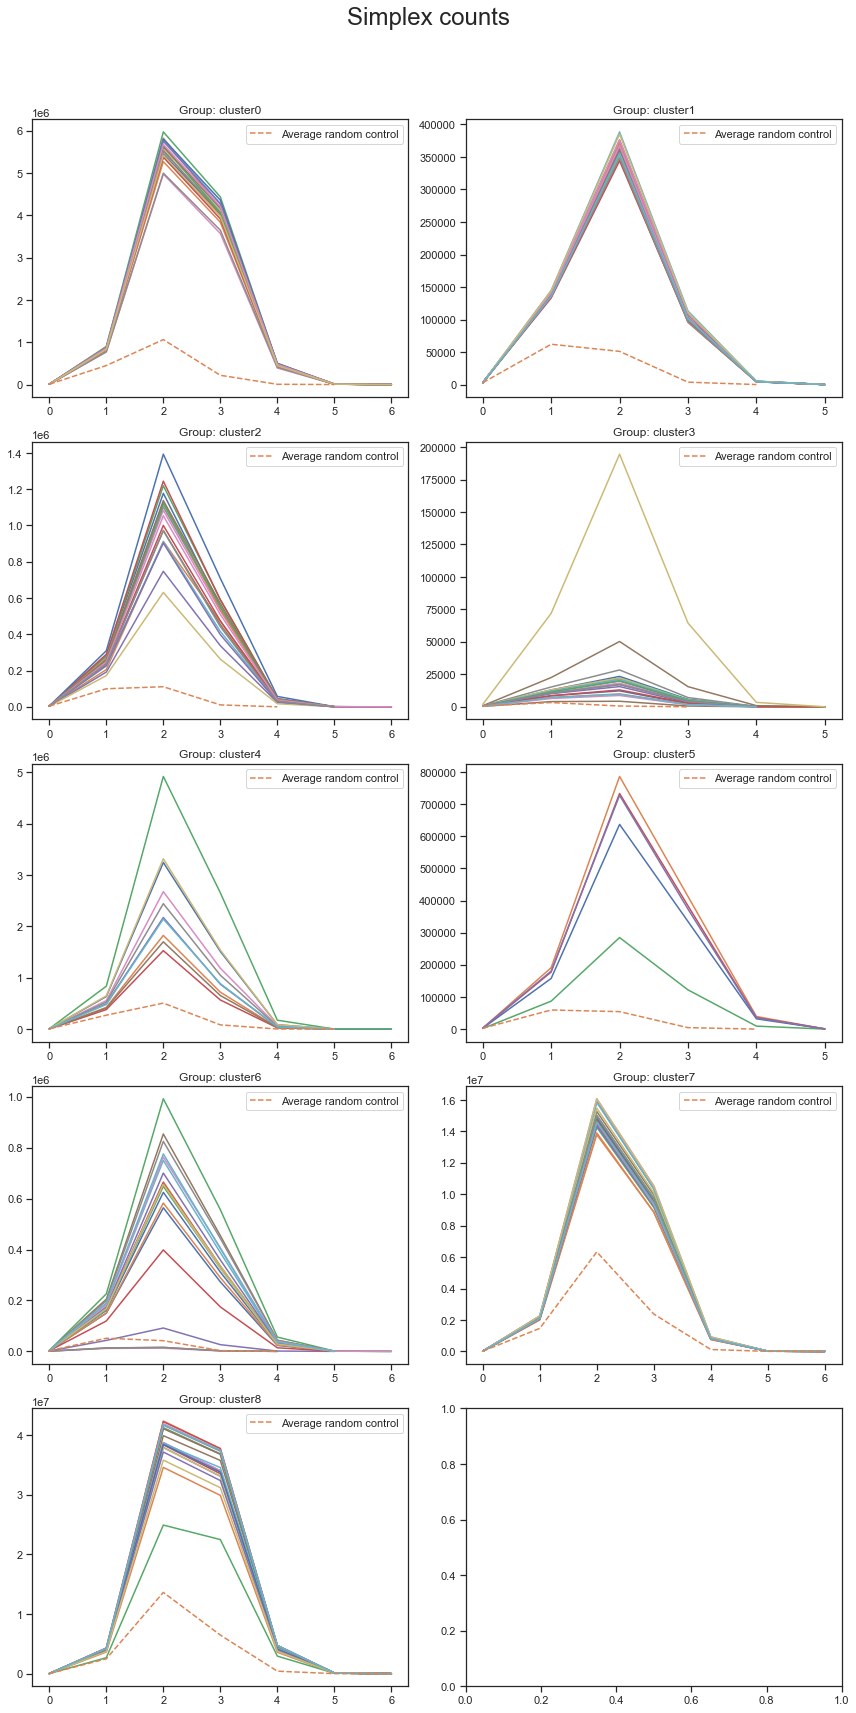

In [5]:
%matplotlib inline
simplex_counts,controls=simplex_counts_consensus(consensus_assemblies,network)
assemblyfire.plots.plot_simplex_counts(simplex_counts, [controls],["Average random control"])
#Add save_fig=True, path_fig=path to parameters to save figure to path

### Union vs. random control 

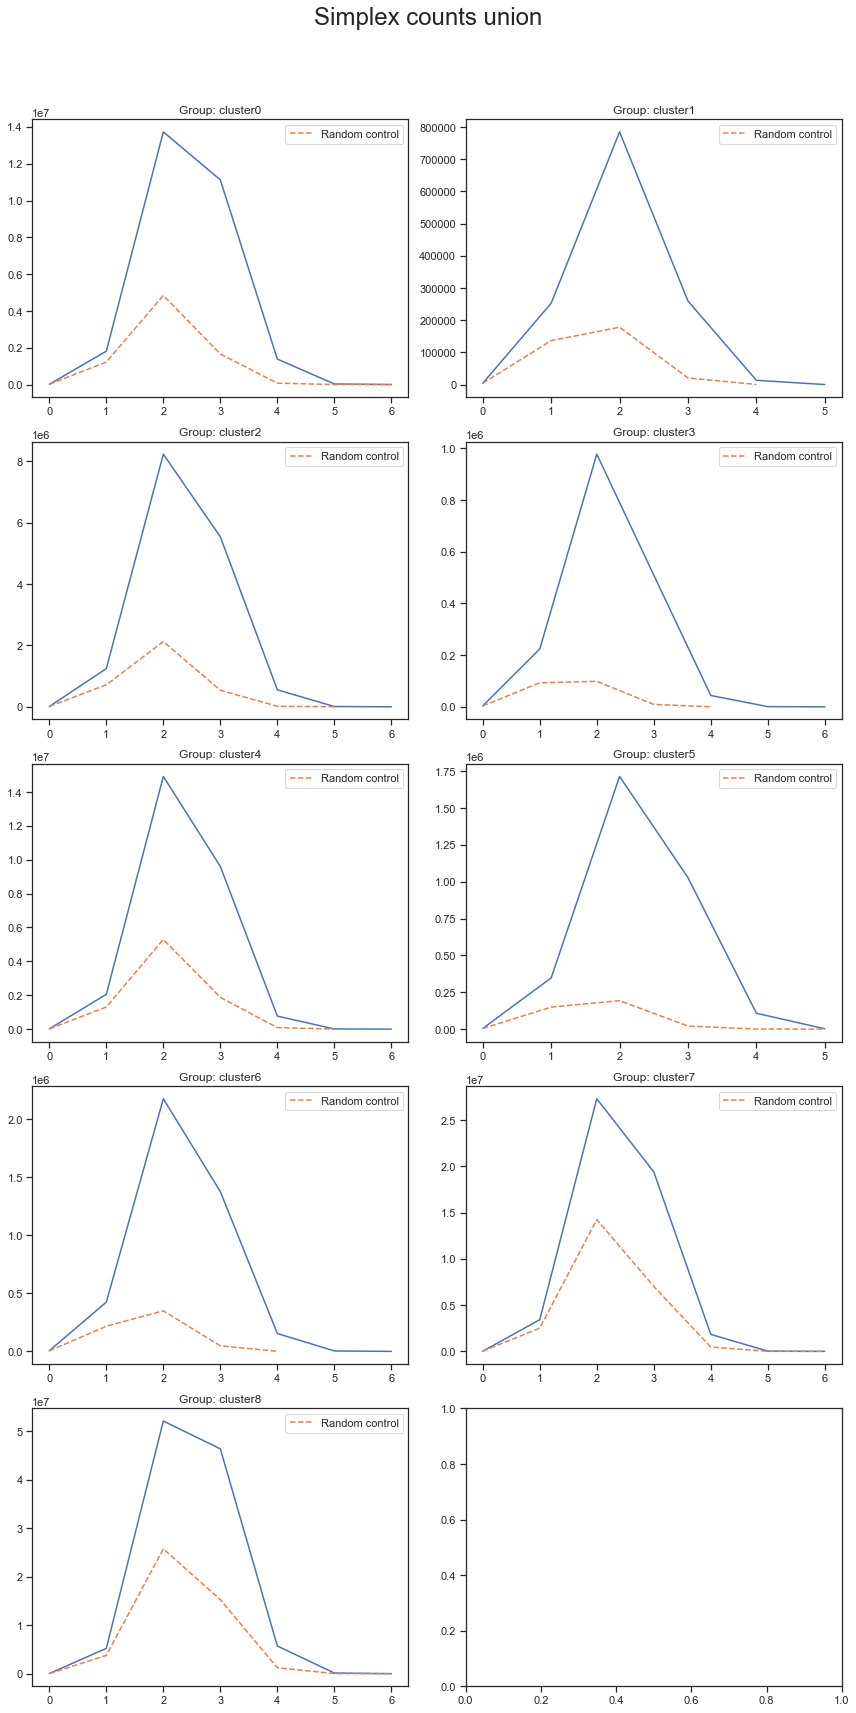

In [6]:
%matplotlib inline 
simplex_counts,controls=simplex_counts_union(consensus_assemblies,network)
assemblyfire.plots.plot_simplex_counts(simplex_counts, [controls],["Random control"], title="Simplex counts union")
#Add save_fig=True, path_fig=path to parameters to save figure to path


### Core vs. random control within union 

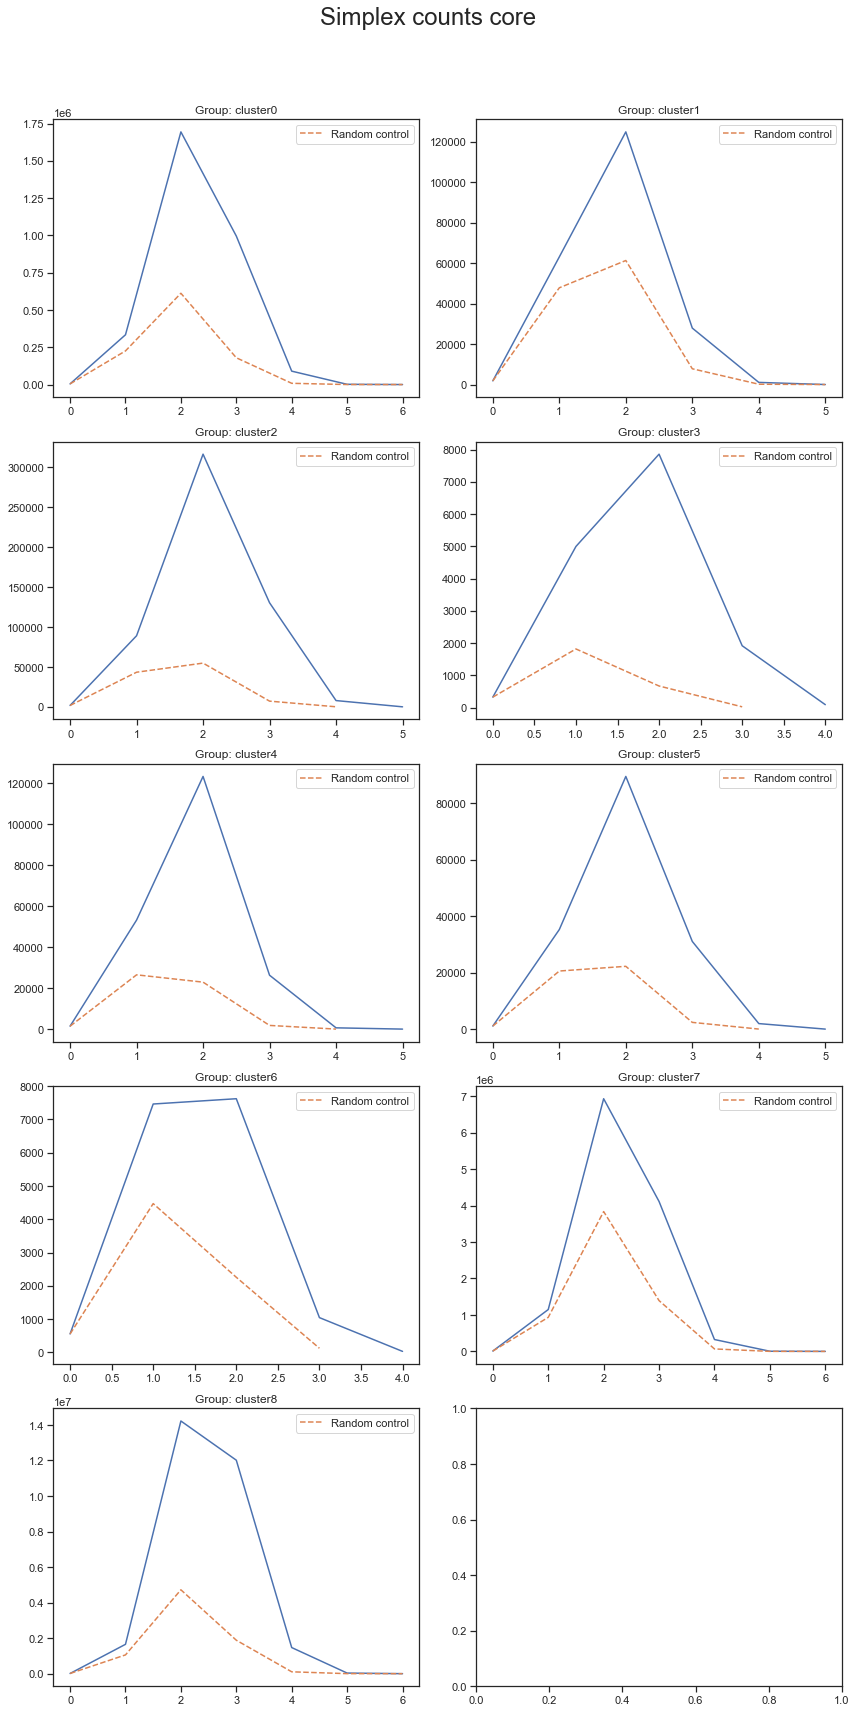

In [7]:
%matplotlib inline 
simplex_counts,controls=simplex_counts_core(consensus_assemblies,network)
assemblyfire.plots.plot_simplex_counts(simplex_counts, [controls],["Random control"], title="Simplex counts core")
#Add save_fig=True, path_fig=path to parameters to save figure to path

### Intersection vs. random control within union 

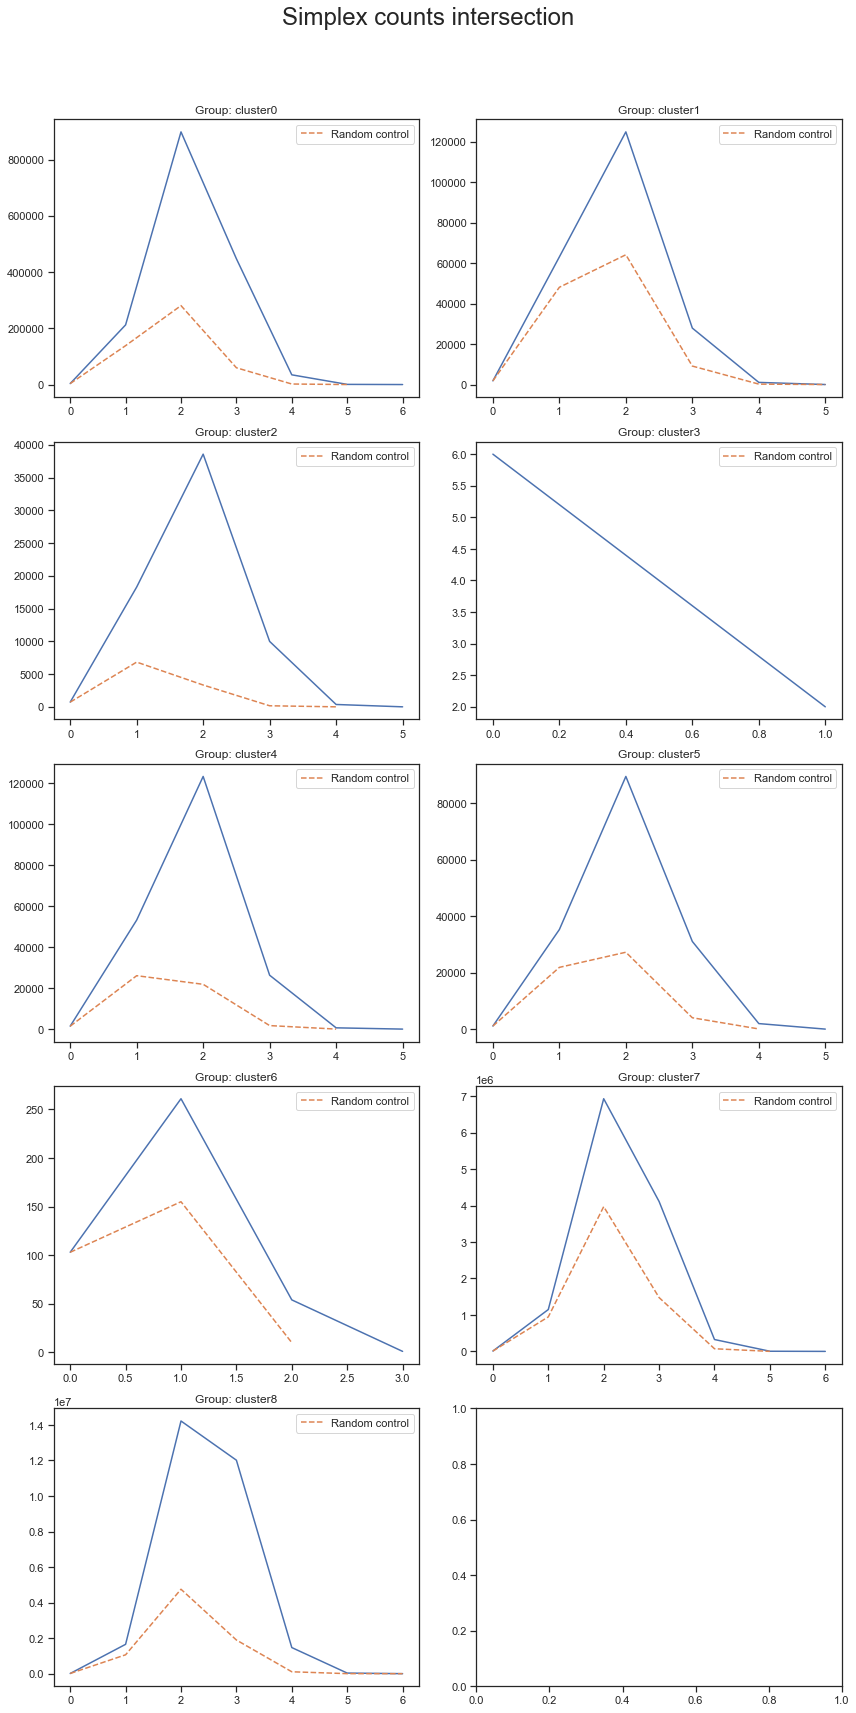

In [8]:
%matplotlib inline 
simplex_counts,controls=simplex_counts_intersection(consensus_assemblies,network)
assemblyfire.plots.plot_simplex_counts(simplex_counts, [controls],["Random control"], title="Simplex counts intersection")
#Add save_fig=True, path_fig=path to parameters to save figure to path

### Core vs. Intersection 

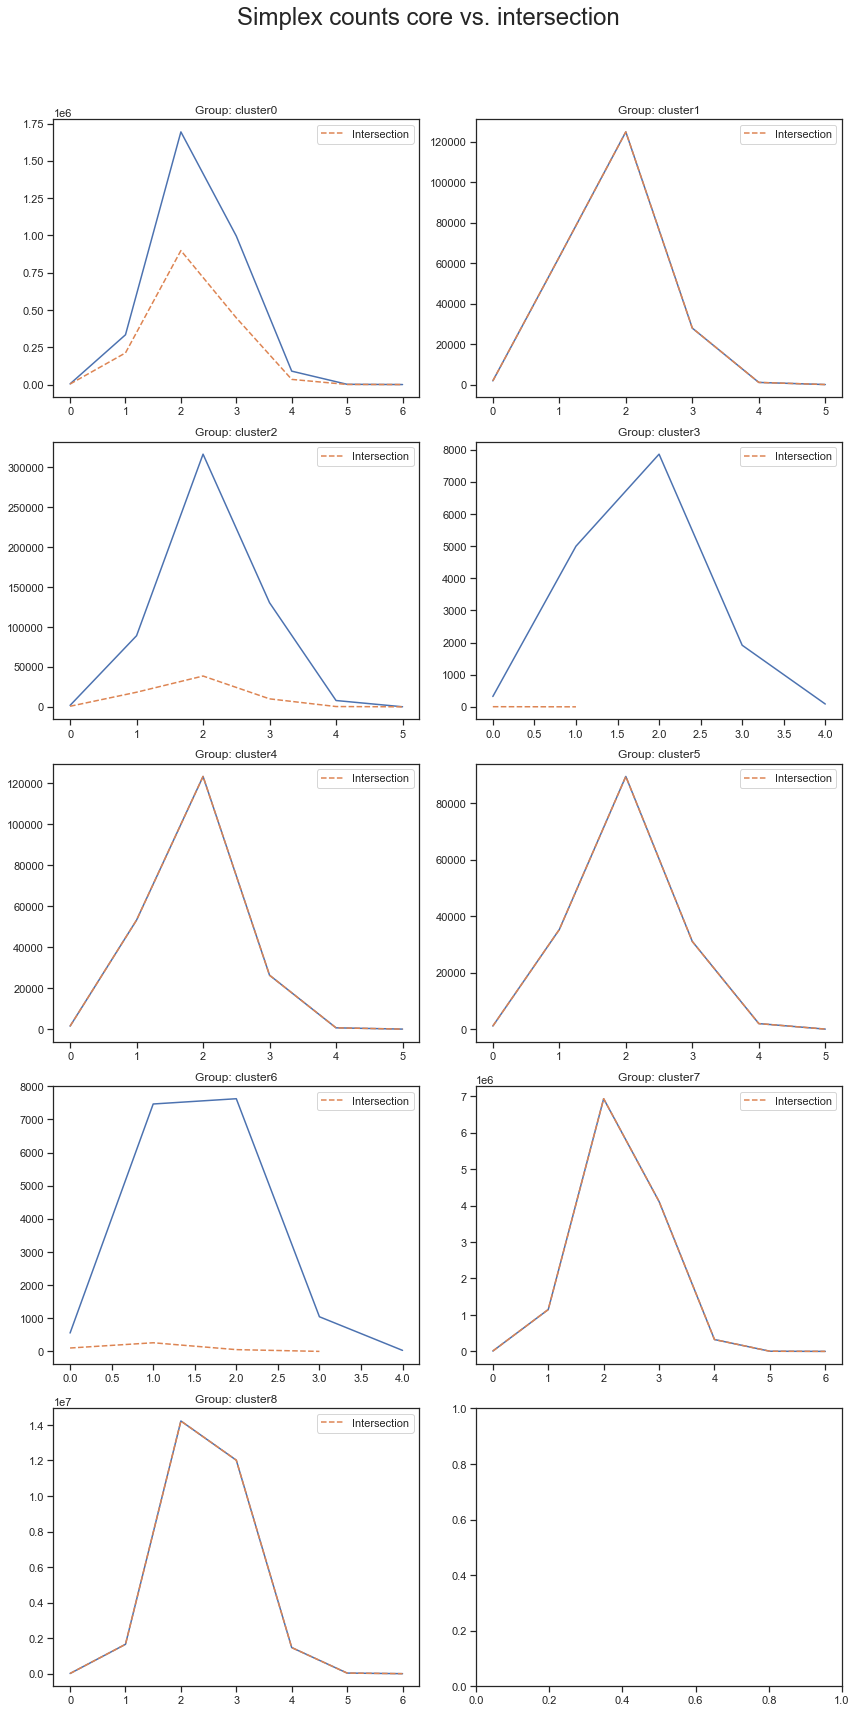

In [9]:
%matplotlib inline 
simplex_counts_core,simplex_counts_intersection=simplex_counts_core_vs_intersection(consensus_assemblies,network)
assemblyfire.plots.plot_simplex_counts(simplex_counts_core, [simplex_counts_intersection],["Intersection"], title="Simplex counts core vs. intersection")
#Add save_fig=True, path_fig=path to parameters to save figure to path